# Kaggle solution with GBM and XGBOOST

In [22]:

#Kaggle competition
#https://www.kaggle.com/mlg-ulb/creditcardfraud/data#


import os
os.getcwd()


'C:\\Users\\Admin'

In [23]:
# import libraries
import pandas as pd
import numpy as np


# import data
df = pd.read_csv("creditcard.csv")


In [24]:

# view the column names
print(len(df.columns),len(df))

31 284807


In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
#NULL HANDLING

In [27]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
#SCALING
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
## scaling the "Amount" and "Time" columns similar to the others variables

from sklearn.preprocessing import StandardScaler
rob_scaler = StandardScaler()

#u can try standard scaler and minmaxscaler as well
#they are impacted by outliers

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# now drop the original columns
df.drop(['Time','Amount'], axis=1, inplace=True)

In [31]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16,-1.050379e-14
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


In [32]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

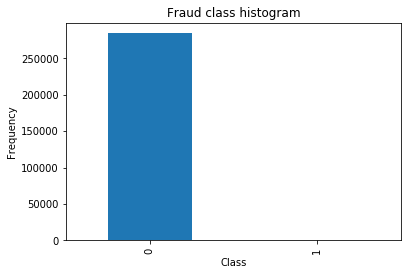

In [49]:
from matplotlib import pyplot as plt

pd.value_counts(df['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


In [53]:

# define X and y variables
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']
y.shape

(284807, 1)

In [52]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')


(568630, 1)

In [57]:

X_ros.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
568625     True
568626     True
568627     True
568628     True
568629     True
Length: 568630, dtype: bool

Text(0, 0.5, 'Frequency')

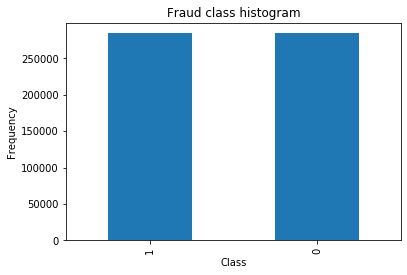

In [51]:
from matplotlib import pyplot as plt

pd.value_counts(y_ros['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


![smote image](smote.png "smote")


![smote image](smote1.png "smote")


In [39]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE(random_state=10)
X_smote, y_smote = oversample.fit_sample(X, y)

In [58]:
df_smote=pd.concat([X_smote,y_smote],axis=1)
df_smote['Class'].value_counts()


1    284315
0    284315
Name: Class, dtype: int64

In [59]:
df_smote.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
568625    False
568626    False
568627    False
568628    False
568629    False
Length: 568630, dtype: bool

Text(0, 0.5, 'Frequency')

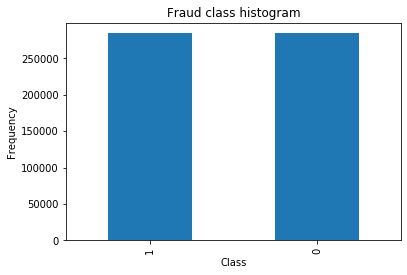

In [41]:

pd.value_counts(df_smote['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


# Over-sampling followed by under-sampling

![](tomek.png "tomek")

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)


In [ ]:
#TARGET - CLASS SKEWMESS ANALYSIS


# scatter plot of examples by class label


In [42]:
# number of fraud and non-fraud observations in the dataset
frauds = len(df_smote[df_smote.Class == 1])
nonfrauds = len(df_smote[df_smote.Class == 0])

print(frauds,nonfrauds)

284315 284315


In [43]:
print("Frauds", frauds); print("Non-frauds", nonfrauds)
#skewed dataset


#over-sampling-SMOTE package
#Synthetic Minority Oversampling Technique
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Frauds 284315
Non-frauds 284315


In [ ]:

# define X and y variables
#X = df.loc[:, df.columns != 'Class']
#y = df.loc[:, df.columns == 'Class']


In [44]:
#MODEL IMPLEMENTATION

import warnings
warnings.filterwarnings('ignore')

In [45]:


# split data into training and testing set
from sklearn.model_selection import train_test_split

# # The complete dataset
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
# Split dataset

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,
                                                                                                    
        random_state = 10)

# BOOSTING MODELS

In [ ]:
                                                 
from sklearn.ensemble import GradientBoostingClassifier

## modeling with BOOSTING

#import model



# XGBOOST

In [47]:

from xgboost import XGBClassifier


# instantiate model
model = XGBClassifier(verbose=11)

# fit 
model.fit(X_train_smote, y_train_smote)


[16:50:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=100,
              verbosity=None)

In [48]:

# predict
y_pred_xg = model.predict(X_test_smote)

In [ ]:
                                                 

## modeling with logistic regression
#import model

from sklearn.linear_model import LogisticRegression

# instantiate model
model = LogisticRegression(verbose=100)

# fit 
model.fit(X_train_smote, y_train_smote)


In [ ]:

# predict
y_pred = model.predict(X_test_smote)

In [ ]:

from sklearn.svm import  LinearSVC,SVC                               
random_state=100

#??SVC
model = LinearSVC(    max_iter=50000,verbose=2)
#model = SVC(kernel='linear', probability=True,random_state=random_state)

# fit 
model.fit(X_train_smote, y_train_smote)



In [ ]:

# predict
y_pred2 = model.predict(X_test_smote)

In [ ]:

from sklearn.svm import  LinearSVC,SVC                               

model = SVC(verbose=3)
# fit 
model.fit(X_train_smote, y_train_smote)

# predict
y_pred22 = model.predict(X_test_smote)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
??RandomForestClassifier

model = RandomForestClassifier(verbose=3  ,    oob_score=True, n_estimators=1000  )

# fit 
model.fit(X_train_smote, y_train_smote)


In [ ]:
model.feature_importances_

## feature importance analysis


In [ ]:
model.feature_importances_
imp=pd.concat([pd.Series(X_train_smote.columns),pd.Series(model.feature_importances_)
          ],axis=1)

imp.columns=['feature','importance']
ordered_imp=imp.sort_values(['importance'],ascending=False)


ordered_imp

In [ ]:

# predict
y_pred3 = model.predict(X_test_smote)

y_pred3_df=pd.DataFrame(y_pred3)
y_pred3_df.columns=["target"]
final_prediction_data=pd.concat([y_pred3_df,X_test_smote.reset_index()],axis=1)
final_prediction_data

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score

classification_report = classification_report(y_test_smote, y_pred)

confusion_matrix = confusion_matrix(y_test_smote, y_pred)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)
print("AUC: ",roc_auc_score(y_test_smote, y_pred))

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score

classification_report = classification_report(y_test_smote, y_pred2)

confusion_matrix = confusion_matrix(y_test_smote, y_pred2)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test_smote, y_pred2))

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score

classification_report = classification_report(y_test_smote, y_pred22)

confusion_matrix = confusion_matrix(y_test_smote, y_pred22)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test_smote, y_pred22))

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classification_report = classification_report(y_test_smote, y_pred3)

confusion_matrix = confusion_matrix(y_test_smote, y_pred3)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)
print("AUC: ",roc_auc_score(y_test_smote, y_pred3))

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classification_report = classification_report(y_test_smote, y_pred_xg)

confusion_matrix = confusion_matrix(y_test_smote, y_pred_xg)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)
print("AUC: ",roc_auc_score(y_test_smote, y_pred_xg))

In [ ]:
from sklearn import metrics

arr=metrics.roc_curve(y_test_smote, y_pred)
arr2=metrics.roc_curve(y_test_smote, y_pred2)
arr22=metrics.roc_curve(y_test_smote, y_pred22)
arr3=metrics.roc_curve(y_test_smote, y_pred3)
arr3=metrics.roc_curve(y_test_smote, y_pred_xg)


In [ ]:

import matplotlib.pyplot as plt

#logistic
fpr=arr[0]
tpr=arr[1]
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)

#Linear SVM
fpr2=arr2[0]
tpr2=arr2[1]
plt.scatter(fpr2,tpr2)
plt.plot(fpr2,tpr2)

#SVM - RBF
fpr22=arr22[0]
tpr22=arr22[1]
plt.scatter(fpr22,tpr22)
plt.plot(fpr22,tpr22)


#randomforest
fpr3=arr3[0]
tpr3=arr3[1]
plt.scatter(fpr3,tpr3)
plt.plot(fpr3,tpr3)



#XGBOOST
fpr_xg=arr_xg[0]
tpr_xg=arr_xg[1]
plt.scatter(fpr_xg,tpr_xg)
plt.plot(fpr_xg,tpr_xg)


plt.plot([0,1],[0,1])
plt.title("ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['logistic','Linear SVM',"SVM",'RandomForest','XGBOOST'])

plt.show()

#sns.lmplot(fpr,tpr)

In [ ]:
#cell for rough work or analysis

fraud_indices
len(X)  #-- 284807

len(X_undersample) #-- 984
len(X_train_smote)#-- 738
len(X_test_smote)#-- 246
